## Vector Visualization

In [4]:
from gensim.models import Word2Vec

# 모델 로딩
model = Word2Vec.load('pre_trained/word2vec')

In [9]:
model.wv.vectors.shape
# 36만개의 단어집합, 100차원의 임베딩 벡터

(358043, 100)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [18]:
def tsnescatterplot(model, word, list_names):
    
    # 입력받은 단어의 Embedding Vector를 t-SNE를 통해 차원축소 시킨 뒤,
    # seaborn 을 통해 결과를 출력
    # 입력 단어 (Red) / 비슷한 단어 (Blue) / Vocabulary 내의 임의의 단어 (Green)
    
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # 입력 단어에 대한 임베딩 벡터 저장
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # most similar 단어 리스트 저장
    close_words = model.wv.most_similar([word])
    
    # 유사한 단어 벡터를 arrays 에 추가
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # list_names 의 단어 벡터를 arrays 에 추가
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # 100 to 20 으로 벡터 차원 축소 by PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # 2차원 t-SNE 좌표 검색 
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # 루프문을 통해 각각의 노드에 주석문 추가
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

In [27]:
# 맷플롭립 폰트 업데이트
import matplotlib 
matplotlib.font_manager._rebuild()

In [28]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Nanum' in i.name:
        print(i.name, i.fname)

NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [29]:
matplotlib.rcParams['font.family'] = 'NanumGothic'

/home/ukyoung/anaconda3/envs/ukyoung/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ukyoung/anaconda3/envs/ukyoung/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


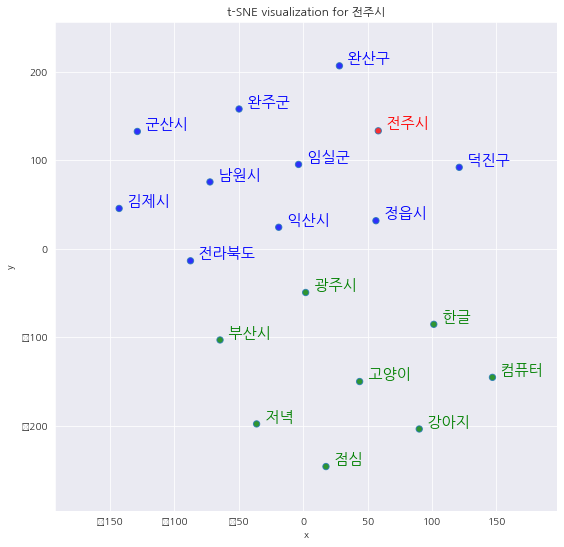

In [32]:
# 10개의 유사한 단어와 8개의 랜덤 단어
tsnescatterplot(model, '전주시', ['강아지', '고양이', '광주시', '부산시', '점심', '저녁', '한글', '컴퓨터'])

/home/ukyoung/anaconda3/envs/ukyoung/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ukyoung/anaconda3/envs/ukyoung/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


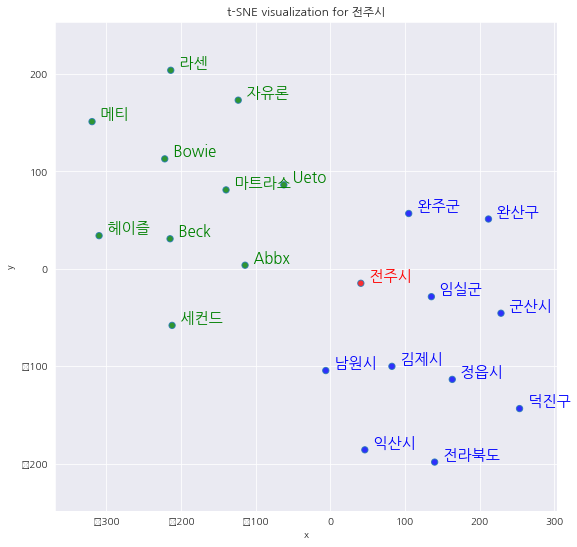

In [34]:
# 10개의 유사한 단어와 10개의 반대되는 단어
tsnescatterplot(model, '전주시', [i[0] for i in model.wv.most_similar(negative=["전주시"])])

/home/ukyoung/anaconda3/envs/ukyoung/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ukyoung/anaconda3/envs/ukyoung/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


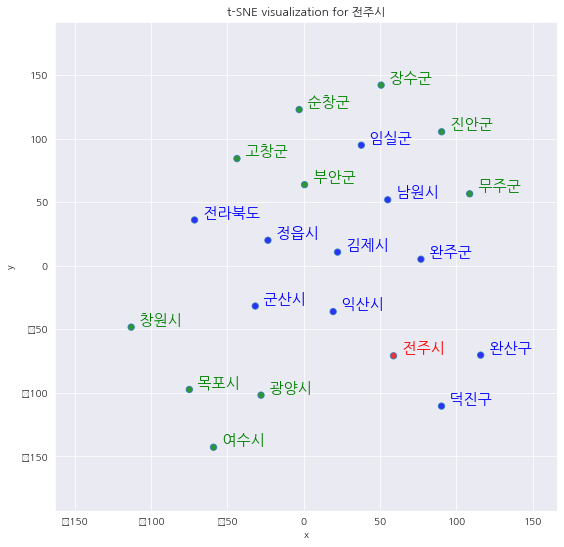

In [36]:
# 10개의 유사한 단어와 11~20번째 유사한 단어
tsnescatterplot(model, '전주시', [i[0] for i in model.wv.most_similar(positive=["전주시"], topn=20)[10:]])